# Import the required libnraries

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from lib import *

# Load the data

In [2]:
# Initialize lists to store audio data and sample rates
rir = np.zeros((2, 7, 6), dtype=object) # room impluse response
sr = np.zeros((2, 7, 6), dtype=object) # sample rate

for i in range(1, 3):  # speaker
    for j in range(-3, 4):  # position
        for k in range(1, 7):  # microphone
            file_path = f'./data/IRs_valerio/pos_{j}_speaker_{i}/ir_pos_{j}_speaker_{i}_mic{k}.wav'
            rir[i-1, j+3, k-1], sr[i-1, j+3, k-1] = librosa.load(file_path,sr=None)

print('all done!')

all done!


In [3]:
sr = sr[0,0,0]
time = np.arange(0, len(rir[0,0,0])) / sr  # Assuming same length for all audio signals
print('sample:',time.size, 'time:', time.size/sr,'s')

sample: 960000 time: 5.0 s


# Check the index of the postions and speakers

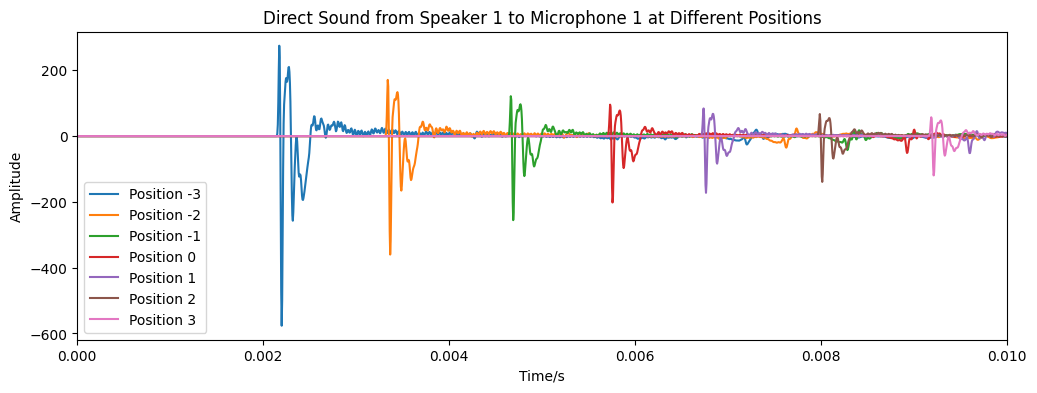

In [4]:
plt.figure(figsize=(12, 4))
# Plot each line
for i in range(0, 7):
    plt.plot(time, rir[0,i,0], label=f'Position {i-3}')

# Add labels and legend
plt.xlabel('Time/s')
plt.ylabel('Amplitude')
plt.title('Direct Sound from Speaker 1 to Microphone 1 at Different Positions')
plt.legend()
plt.xlim(0, 0.01)
# Show the plot
plt.show()

## Conclusion: speaker and position indexes are right!

# Determin the relationship between the microphones' index and their position

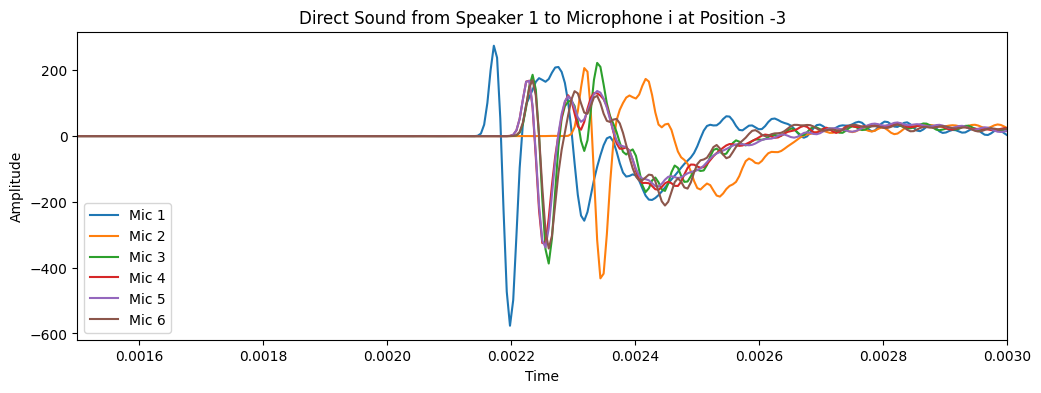

In [5]:
plt.figure(figsize=(12, 4))
# Plot each line
for i in range(0, 6):
    plt.plot(time, rir[0,0,i], label=f'Mic {i+1}')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Direct Sound from Speaker 1 to Microphone i at Position -3')
plt.legend()
plt.xlim(0.0015, 0.003)
# Show the plot
plt.show()


Conclusion: Mic1 and Mic2 lays at x axis

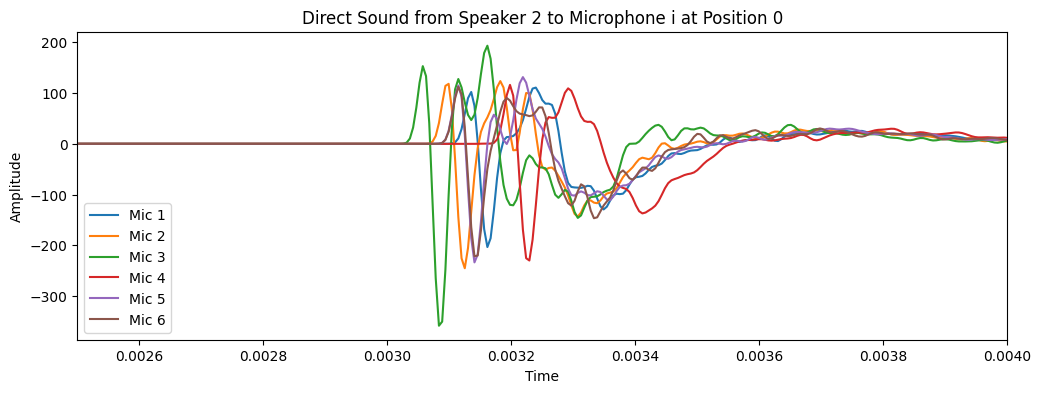

In [6]:
plt.figure(figsize=(12, 4))
# Plot each line
for i in range(0, 6):
    plt.plot(time, rir[1,2,i], label=f'Mic {i+1}')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Direct Sound from Speaker 2 to Microphone i at Position 0')
plt.legend()
plt.xlim(0.0025, 0.004)
# Show the plot
plt.show()


Conclusion: Mic3 and Mic4 lays at y axis

# Create the position 3D array and plot the speakers and microphones

In [7]:
# Create positions for mics and speakers in meters
p_speaker1 = np.array([-1, 0, 0])
p_speaker2 = np.array([0, 0.5, 0])
p_mic = np.zeros((7, 6), dtype=object)
Radius = 0.025  # 25 mm
for j in range(0, 7):  # position
    p_center = np.array([j-3, 0, 0])*0.4
    p_mic[j, 0] = p_center + np.array([-Radius, 0, 0 ])
    p_mic[j, 1] = p_center + np.array([Radius, 0, 0])
    p_mic[j, 2] = p_center + np.array([0, Radius, 0])
    p_mic[j, 3] = p_center + np.array([0, -Radius, 0])
    p_mic[j, 4] = p_center + np.array([0, 0, Radius])
    p_mic[j, 5] = p_center + np.array([0, 0, -Radius])

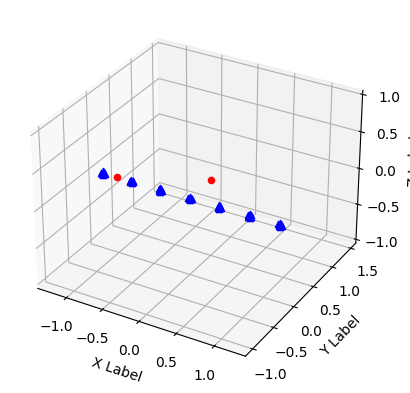

In [8]:
# plot all mics and speakers
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(0, 0, 0, c='r', marker='*')
ax.scatter(p_speaker1[0], p_speaker1[1], p_speaker1[2], c='r', marker='o')
ax.scatter(p_speaker2[0], p_speaker2[1], p_speaker2[2], c='r', marker='o')
for i in range(0, 7):
    for j in range(0, 6):
        ax.scatter(p_mic[i, j][0], p_mic[i, j][1], p_mic[i, j][2], c='b', marker='^')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axis('equal')
plt.show()

In [9]:
# calculate distance between mic and speaker
np.linalg.norm(p_mic[0, 0] - p_speaker1)

0.2250000000000001